In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

In [5]:
data = pd.read_csv("evaluation.csv", sep=";")
data

,Unnamed: 0,title,text,label
0,0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0
...,...,...,...,...
8112,8112,Sean Hannity Throws Hissy Fit After Real Repo...,"Just like Donald Trump, Sean Hannity has a thi...",0
8113,8113,FORMER ASST FBI DIRECTOR WARNS ANTI-TRUMP KABA...,Former Asst. FBI Director James Kallstrom spok...,0
8114,8114,John McCain: Trump’s Attacks On The Press Are...,Donald Trump has declared the media to be the...,0
8115,8115,Syria's Deir al-Zor air base working again: st...,BEIRUT (Reuters) - The Deir al-Zor military ai...,1


In [6]:
data = data.drop(columns=['Unnamed: 0','title'],axis=1)
data

,text,label
0,WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,MOSCOW (Reuters) - A proposal to convene a con...,1
2,"In a baffling fit of rage, an Oregon State Pol...",0
3,The last thing any politician running for the ...,0
4,This is too good to miss! Mr. Teleprompter did...,0
...,...,...
8112,"Just like Donald Trump, Sean Hannity has a thi...",0
8113,Former Asst. FBI Director James Kallstrom spok...,0
8114,Donald Trump has declared the media to be the...,0
8115,BEIRUT (Reuters) - The Deir al-Zor military ai...,1


In [8]:
vocab_size = 10000
max_length = 200    
embedding_dim = 64 

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text'])

In [10]:
sequences = tokenizer.texts_to_sequences(data['text'])

In [11]:
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [12]:
labels = np.array(data['label'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [15]:
model = Sequential([
    Embedding(vocab_size, embedding_dim),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8365 - loss: 0.5729 - val_accuracy: 0.9329 - val_loss: 0.2002
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9569 - loss: 0.1489 - val_accuracy: 0.9637 - val_loss: 0.1240
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9767 - loss: 0.0824 - val_accuracy: 0.9686 - val_loss: 0.1070
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9826 - loss: 0.0584 - val_accuracy: 0.9729 - val_loss: 0.0966
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9909 - loss: 0.0341 - val_accuracy: 0.9698 - val_loss: 0.0984
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9935 - loss: 0.0264 - val_accuracy: 0.9729 - val_loss: 0.0916
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9920 - loss: 0.0294 - val_accuracy: 0.9470 - val_loss: 0.1417
Epoch 8/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9948 - loss: 0.0173 - val_accu

<Axes: >

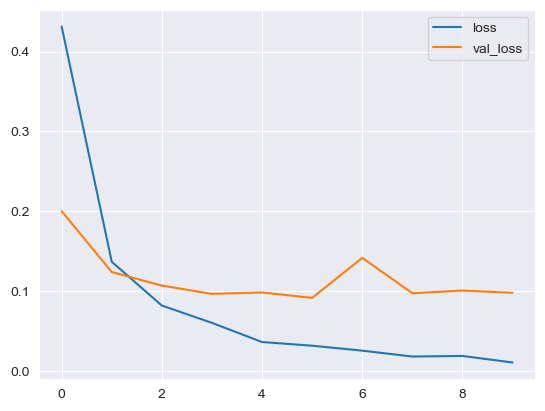

In [19]:
import seaborn as sns
sns.lineplot(history.history['loss'], label='loss')
sns.lineplot(history.history['val_loss'], label='val_loss')

In [20]:
Y_pred = model.predict(X_test).round()

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))
print(f' Accuracy: {accuracy_score(y_test, Y_pred) * 100}%\n\n')

[[747  17]
 [ 23 837]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       764
           1       0.98      0.97      0.98       860

    accuracy                           0.98      1624
   macro avg       0.98      0.98      0.98      1624
weighted avg       0.98      0.98      0.98      1624

 Accuracy: 97.53694581280789%


